In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import pickle
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

import matplotlib.pyplot as plt

# Load Dataset
df = pd.read_csv('processed_dataset_lokasi.csv')

# Pilih Datafrane
data_model = df[['Place_Name','City','Images','Price','Rating','Lat', 'Long','Category','Description']].copy()  

# Rescale ratings antara 1 and 5
data_model['Rating'] = data_model['Rating'].apply(lambda x: round(x/2) if x <= 10 else 5)

# Buat variable test dan train
X = df[['City','Price']]
y = df['Rating']

# Convert City ke one-hot encoding
X = pd.get_dummies(X, columns=['City'])

# Convert y ke categorical
y = tf.keras.utils.to_categorical(y-1, num_classes=5)

# Split data ke train, test, dan validation sets (50% train, 20% validation, 30% test)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=(0.2/0.7), random_state=42)

# Scale Dataframe
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# buat neural network model
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(16, activation='relu'))
model.add(Dense(5, activation='softmax'))  

# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=32)

# Evaluasi model
loss, accuracy = model.evaluate(X_test, y_test)

print('Train Accuracy: ', max(history.history['accuracy']))
print('Validation Accuracy: ', max(history.history['val_accuracy']))
print('Train Loss: ', min(history.history['loss']))
print('Validation Loss: ', min(history.history['val_loss']))

# Save model sebagai pkl dan h5
data_model.to_hdf('model.h5', key='df', mode='w')
with open('model.pkl', 'wb') as f:
    pickle.dump(scaler, f)

C:\Users\muhri\AppData\Local\Temp\ipykernel_28680\1621493103.py:44: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=32, verbose=0)


In [24]:
print(f'Test loss: {loss}, Test accuracy: {accuracy}')
print(f'Train loss: {loss}, Train accuracy: {accuracy}')

Test loss: 0.1242728978395462, Test accuracy: 0.9848484992980957
Train loss: 0.1242728978395462, Train accuracy: 0.9848484992980957


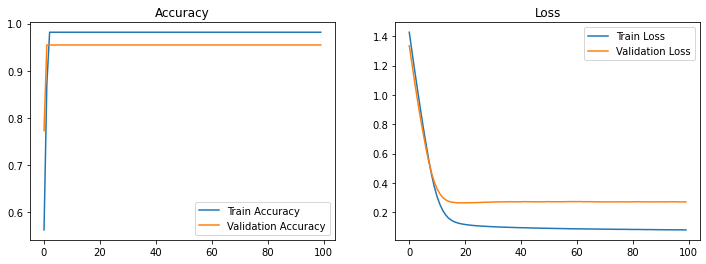

In [25]:
# Plotting training history
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.show()